<a href="https://colab.research.google.com/github/jarodriguezf/Projects/blob/main/Marketing_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El objetivo de este miniproyecto es analizar los datos de venta de X empresa, ayudando al departamenteo de marketing a segmentar los clientes (en categorias) para mejorar las propuestas hacia estos mismos.

Dataset usado : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

**PARTE 1 - CARGA DE DATOS Y LIMPIEZA BASICA INICIAL**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as tf
from datetime import datetime

from google.colab import files, drive
%matplotlib inline

In [2]:
# Carga de datos desde Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Nos situamos en el directorio de trabajo
%cd "/content/drive/MyDrive/Curso de Masterclass en IA Moderna/3. Marketing AI"

/content/drive/MyDrive/Curso de Masterclass en IA Moderna/3. Marketing AI


In [4]:
# Cargamos el csv con los datos de venta de los clientes
sales_df = pd.read_csv('sales_data_sample.csv', encoding='unicode_escape')
sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
# Convertimos la caracteristica ORDERDATE a datetime
sales_df['ORDERDATE'] = sales_df['ORDERDATE'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M"))
sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [ ]:
# nulos en caracteristicas
sales_df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [6]:
# Dado que algunas caracteristicas nulas presentan un elevado numero de NaN las eliminare, Asi como otras que
# meramente proporcionam informacion redundante.
sales_df = sales_df.drop(['ADDRESSLINE1','ADDRESSLINE2','POSTALCODE','CITY','TERRITORY',
                          'PHONE','STATE','CONTACTFIRSTNAME','CONTACTLASTNAME','CUSTOMERNAME','ORDERNUMBER'], axis=1)
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [ ]:
# Observamos los valores unicos por columna
sales_df.nunique()

QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
COUNTRY              19
DEALSIZE              3
dtype: int64

**PARTE 2.1 - ANALISIS EXPLORATORIO DE DATOS Y LIMPIEZA**

In [7]:
# Visualizacion de frecuencia en caracteristicas
def bar_visualization(col_value):
  country_name = sales_df[col_value].value_counts().index
  count_country = sales_df[col_value].value_counts()

  fig = px.bar(x=country_name, y=count_country, color=country_name)
  fig.show()

In [ ]:
bar_visualization('COUNTRY')

In [ ]:
bar_visualization('STATUS')

Aqui podemos ver como la columna STATUS esta muy desbalanceada, por tanto lo mejor seria prescindir de ella

In [8]:
sales_df.drop('STATUS', inplace=True, axis = 1)

In [ ]:
bar_visualization('PRODUCTLINE')

In [ ]:
bar_visualization('DEALSIZE')

In [9]:
# Funcion que codifica a dummies las caracteristicas
def get_dummies (x):
  df_dummies = pd.get_dummies(sales_df[x], drop_first=True)
  sales_df.drop(x, inplace=True, axis =1)
  return pd.concat([sales_df,df_dummies], axis = 1)

In [10]:
sales_df = get_dummies('DEALSIZE')
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,S10_1678,USA,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,S10_1678,France,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,S10_1678,France,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,S10_1678,USA,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,S10_1678,USA,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,Ships,54,S72_3212,Spain,0,1
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,Ships,54,S72_3212,Finland,1,0
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,Ships,54,S72_3212,Spain,1,0
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,Ships,54,S72_3212,France,0,1


In [11]:
sales_df = get_dummies('COUNTRY')

In [12]:
sales_df = get_dummies('PRODUCTLINE')

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   QUANTITYORDERED   2823 non-null   int64         
 1   PRICEEACH         2823 non-null   float64       
 2   ORDERLINENUMBER   2823 non-null   int64         
 3   SALES             2823 non-null   float64       
 4   ORDERDATE         2823 non-null   datetime64[ns]
 5   QTR_ID            2823 non-null   int64         
 6   MONTH_ID          2823 non-null   int64         
 7   YEAR_ID           2823 non-null   int64         
 8   MSRP              2823 non-null   int64         
 9   PRODUCTCODE       2823 non-null   object        
 10  Medium            2823 non-null   uint8         
 11  Small             2823 non-null   uint8         
 12  Austria           2823 non-null   uint8         
 13  Belgium           2823 non-null   uint8         
 14  Canada            2823 n

In [13]:
# Para algunaas columnas como PRODUCTCODE, las transformaremos a categorical,
# esto se hace ya que al contener tantos valores distintos, si codificaramos en dummies nos devolveria muchas columnas.
# Transformar en categorical nos permite usar la propiedad 'codes', que codifica en la misma columna los valores distintos.

sales_df['PRODUCTCODE'] = pd.Categorical(sales_df['PRODUCTCODE']).codes
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Sweden,Switzerland,UK,USA,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,0,...,0,0,0,1,1,0,0,0,0,0
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,0,...,0,0,0,0,1,0,0,0,0,0
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,0,...,0,0,0,0,1,0,0,0,0,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,0,...,0,0,0,1,1,0,0,0,0,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,0,...,0,0,0,1,1,0,0,0,0,0


**PARTE 2.2 - ANALISIS EXPLORATORIO DE DATOS Y LIMPIEZA**

In [14]:
sales_df_group = sales_df.groupby(sales_df['ORDERDATE']).sum()
sales_df_group

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Medium,...,Sweden,Switzerland,UK,USA,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-01-06,151,288.78,10,12133.25,4,4,8012,363,174,2,...,0,0,0,4,0,0,0,0,0,4
2003-01-09,142,284.96,10,11432.34,4,4,8012,372,181,2,...,0,0,0,0,0,0,0,0,0,4
2003-01-10,80,150.14,3,6864.05,2,2,4006,155,37,1,...,0,0,0,2,0,0,0,0,0,2
2003-01-29,541,1417.54,136,54702.00,16,16,32048,1695,723,10,...,0,0,0,0,0,0,0,0,7,6
2003-01-31,443,1061.89,91,44621.96,13,13,26039,1365,720,8,...,0,0,0,0,0,0,0,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-13,259,561.18,21,31821.90,12,30,12030,728,101,3,...,0,0,0,0,6,0,0,0,0,0
2005-05-17,509,1269.43,105,59475.10,28,70,28070,1669,462,8,...,0,0,0,0,0,0,0,0,0,0
2005-05-29,607,1148.40,94,51233.18,30,75,30075,1328,797,8,...,0,0,0,2,0,0,0,0,0,8


In [15]:
# Visualizacion de fechas con venta mayor
fig = px.line(sales_df_group, y='SALES', title='Ventas por mes y año')
fig.show()

Las mayores ventas se dan en el mes de Noviembre, coincidiendo con el black friday.

In [16]:
# Eliminamos ORDERDATE, ya que no lo usaremos mas, ni tampoco en las predicciones
sales_df.drop("ORDERDATE", axis =1, inplace=True)
sales_df.shape

(2823, 35)

In [17]:
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Medium,...,Sweden,Switzerland,UK,USA,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,1,2,2003,95,0,0,...,0,0,0,1,1,0,0,0,0,0
1,34,81.35,5,2765.90,2,5,2003,95,0,0,...,0,0,0,0,1,0,0,0,0,0
2,41,94.74,2,3884.34,3,7,2003,95,0,1,...,0,0,0,0,1,0,0,0,0,0
3,45,83.26,6,3746.70,3,8,2003,95,0,1,...,0,0,0,1,1,0,0,0,0,0
4,49,100.00,14,5205.27,4,10,2003,95,0,1,...,0,0,0,1,1,0,0,0,0,0


<Axes: >

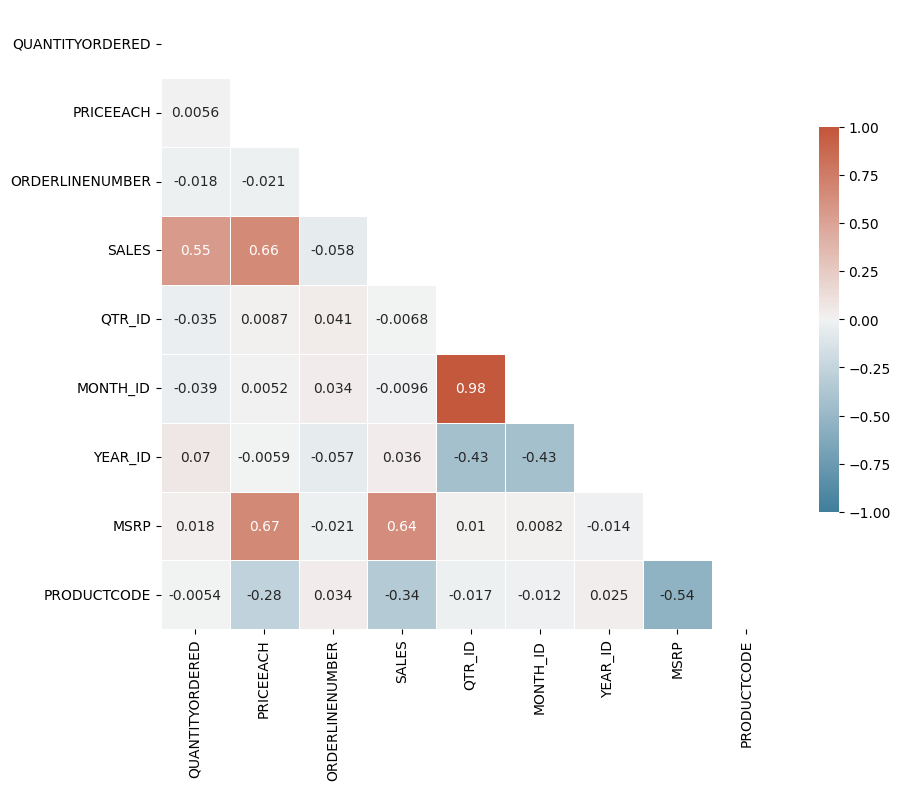

In [ ]:
# Matriz de correlacion (resolver problemas de colinealidad)
corr=sales_df.iloc[:,:9].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5})

Variables altamente correlacionadas:

- MSRP > SALES (no es tan excesivamente alta como para eliminar alguna)
- QTR_ID > MONTH_ID (eliminamos el trimestre, dado que el mes representa mayor valor especifico)

In [18]:
# Eliminamos la caracteristica QTR_ID
sales_df.drop('QTR_ID', axis=1,inplace=True)

In [ ]:
# Visualizacion de distribucion de caracteristicas (suma de histograma, kde y grafico de alfombra por columnas)
plt.figure(figsize=(10,10))
for i in range(8):
  if 'ORDERLINENUMBER' != sales_df.columns[i]:
    col_name = sales_df.columns[i]
    fig = tf.create_distplot([sales_df[col_name].apply(lambda x: float(x))], ['distplot'])
    fig.update_layout(title_text=col_name)
    fig.show()

<Figure size 1000x1000 with 0 Axes>

In [ ]:
# Realizamos un diagrama de parcelas (relaciones entre variables)
plt.figure(figsize=(25,25))

fig = px.scatter_matrix(sales_df, dimensions=sales_df.iloc[:,:8], color='MONTH_ID')
fig.update_layout(title='Sales Data', width=1200, height=1200)
fig.show()

<Figure size 2500x2500 with 0 Axes>

Tendencias vistas:

- SALES Y QUANTITYORDERED, mantiene una tendencia
- MSRP y PRICEEACH, mantiene un atendencia
- PRICEEACH y SALES, mantiene una tendencia
El crecimiento de las ventas se nota en el paso de los años (SALES FRENTE A YEAR_ID).
Haciendo zoom en SALES y QUANTITYORDERED, podemos ver la informacion mensual codificada en colores (Las mayores ventas se dan en los meses 4, 5 y 7).

**MODELO DE AGRUPACION**

In [19]:
#Escalado de variables
scaler = StandardScaler()
sales_df_scaled = scaler.fit_transform(sales_df)

In [24]:
sales_df_scaled

array([[-0.52289086,  0.5969775 , -1.05705871, ..., -0.16745383,
        -0.34547029, -0.52337077],
       [-0.11220131, -0.11445035, -0.34701507, ..., -0.16745383,
        -0.34547029, -0.52337077],
       [ 0.60650538,  0.54938372, -1.05705871, ..., -0.16745383,
        -0.34547029, -0.52337077],
       ...,
       [ 0.81185016,  0.81015797, -0.58369628, ..., -0.16745383,
        -0.34547029, -0.52337077],
       [-0.11220131, -1.06186404, -1.29373992, ..., -0.16745383,
        -0.34547029, -0.52337077],
       [ 1.2225397 , -0.89925195,  0.59970978, ..., -0.16745383,
        -0.34547029, -0.52337077]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

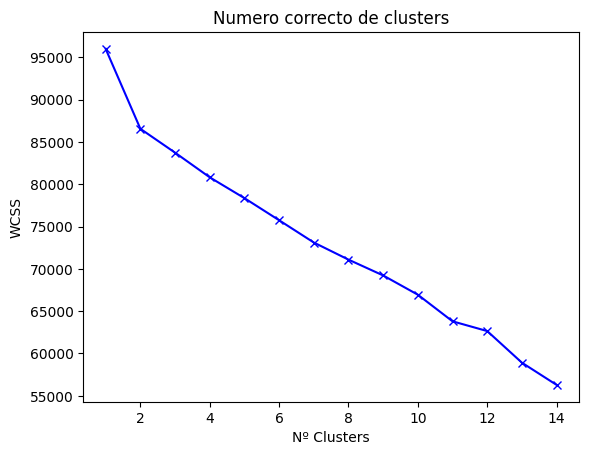

In [29]:
# Metodo del codo para hallar el numero de cluster correcto
scores = []

range_values = range(1,15)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(sales_df_scaled)
  scores.append(kmeans.inertia_)

# Visualizamos
plt.plot(range_values, scores, 'bx-')
plt.title('Numero correcto de clusters')
plt.xlabel('Nº Clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
# Aplicamos KMeans con 5 clusters
kmeans = KMeans(5)
kmeans.fit(sales_df_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [31]:
# Etiqueta que corresponden a cada una de las observaciones
labels

array([1, 1, 2, ..., 2, 1, 2], dtype=int32)

In [32]:
kmeans.cluster_centers_.shape

(5, 34)

In [33]:
# Creamos un df que cargara el nº del cluster (5) por las 34 caracteristicas
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Medium,Small,...,Sweden,Switzerland,UK,USA,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,-0.174895,-0.054410,0.333705,-0.129341,0.161095,-0.115185,-0.057672,0.106100,-0.201794,0.189892,...,-0.143553,-0.105371,-0.231843,-0.742934,-0.309438,0.533780,-0.108057,-0.004465,-0.288124,0.359785
1,-0.471332,-0.729127,0.021839,-0.813738,0.005498,-0.000531,-0.578715,0.275942,-0.980703,1.096370,...,0.004180,-0.030601,0.039682,0.043812,0.036532,0.044013,0.082466,0.050476,-0.039697,0.066705
2,0.395825,0.598742,-0.053989,0.666051,0.004100,0.013363,0.467079,-0.230849,0.818796,-0.912100,...,0.021207,0.042875,0.007540,0.091765,0.006623,-0.082122,-0.053579,-0.055361,0.027684,-0.073821
3,0.033909,-0.057189,0.117244,0.035146,-0.603897,0.539232,-0.013022,0.158201,-0.172858,0.169384,...,-0.143553,-0.105371,-0.231843,-0.742934,0.173523,0.641076,0.048105,0.068671,-0.158543,-0.102091
4,-0.016027,-0.017022,0.099384,0.053142,0.012797,-0.423279,0.132777,-0.129105,-0.018495,0.028576,...,-0.143553,-0.105371,-0.231843,-0.742934,-0.325106,-0.348674,-0.116996,0.221106,0.597843,-0.092018


In [34]:
# Desescalamos para poder interpretar mejor los datos
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Medium,Small,...,Sweden,Switzerland,UK,USA,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,33.389381,82.561062,7.876106,3315.701858,7.681416,2003.734513,98.398230,57.123894,3.893805e-01,5.486726e-01,...,1.734723e-17,-3.469447e-18,2.775558e-17,-1.110223e-16,0.017699,2.743363e-01,0.053097,0.026549,0.017699,0.362832
1,30.502165,68.951550,6.558442,2055.358996,7.112554,2003.814719,77.462338,62.487446,-1.054712e-15,1.000000e+00,...,2.077922e-02,7.792208e-03,5.974026e-02,3.766234e-01,0.129004,1.220779e-01,0.105628,0.035498,0.094372,0.242424
2,38.948034,95.735583,6.238062,4780.448511,7.107444,2003.824438,119.483146,46.483146,8.995787e-01,-1.276756e-15,...,2.317416e-02,1.544944e-02,5.266854e-02,3.995787e-01,0.119382,8.286517e-02,0.068118,0.018258,0.115169,0.184691
3,35.423077,82.505000,6.961538,3618.611731,4.884615,2004.192308,100.192308,58.769231,4.038462e-01,5.384615e-01,...,-6.938894e-18,-3.469447e-18,-2.081668e-17,-5.551115e-17,0.173077,3.076923e-01,0.096154,0.038462,0.057692,0.173077
4,34.936709,83.315190,6.886076,3651.752025,7.139241,2003.518987,106.050633,49.696203,4.810127e-01,4.683544e-01,...,1.387779e-17,-3.469447e-18,-6.938894e-18,5.551115e-17,0.012658,-8.326673e-17,0.050633,0.063291,0.291139,0.177215


**Interpretacion del cluster**

*Mayor a menor beneficioso:*

*   **Cluster 2 (mas alto):** Estos clientes compran articulos en mayor cantidad -38, asi como con un precio más alto -95. Podemos decir que tienen un mayor poder adquisitivo que el resto. Compran la mayor parte del año al precio minimo garantizado mas elevado -119. Con ventas en -47.
*   **Cluster 4:** Este grupo es el segundo mas alto, comprando en cantidades de -34 y con precios en torno a -83. Con unas ventas globales de -36 y un precio minimo garantizado de -106
*   **Cluster 3:** Este grupo es el tercero, comprando en cantidades de -35 y con precios en torno a -82. Suelen estar activos no todo el año. tienen unas ventas globales de -36 y un precio minimo de -100
*   **Cluster 0:** Este grupo es el cuarto, comprando en cantidades de -33 y con precios en torno a -82. Suelen estar activos no todo el año. Con ventas globales en -33 y precio minimo en -98.
*   **Cluster 1 (mas bajo):** Este grupo es el ultimo, comprando en cantidades de -30 y con precios en torno a -68. Suelen estar activos practicamente todo el año. Con ventas globales de -20 a un precio minimo de -77

In [35]:
# Predecimos con kmeans los cluster a cada uno de los clientes de forma individual
y_kmeans = kmeans.fit_predict(sales_df_scaled)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 0, 1, ..., 3, 3, 3], dtype=int32)

In [36]:
# Agregamos una columna al df original (sales_df) a cada punto de datos, permitiendo poder identificar cada cliente individualmente en su grupo
sale_df_cluster = pd.concat([sales_df, pd.DataFrame({'cluster':labels})], axis = 1)
sale_df_cluster

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Medium,Small,...,Switzerland,UK,USA,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,cluster
0,30,95.70,2,2871.00,2,2003,95,0,0,1,...,0,0,1,1,0,0,0,0,0,1
1,34,81.35,5,2765.90,5,2003,95,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,41,94.74,2,3884.34,7,2003,95,0,1,0,...,0,0,0,1,0,0,0,0,0,2
3,45,83.26,6,3746.70,8,2003,95,0,1,0,...,0,0,1,1,0,0,0,0,0,2
4,49,100.00,14,5205.27,10,2003,95,0,1,0,...,0,0,1,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,12,2004,54,108,0,1,...,0,0,0,0,0,1,0,0,0,1
2819,29,100.00,1,3978.51,1,2005,54,108,1,0,...,0,0,0,0,0,1,0,0,0,2
2820,43,100.00,4,5417.57,3,2005,54,108,1,0,...,0,0,0,0,0,1,0,0,0,2
2821,34,62.24,1,2116.16,3,2005,54,108,0,1,...,0,0,0,0,0,1,0,0,0,1


In [37]:
sale_df_cluster['ORDERLINENUMBER']=sale_df_cluster['ORDERLINENUMBER'].apply(lambda x: float(x))

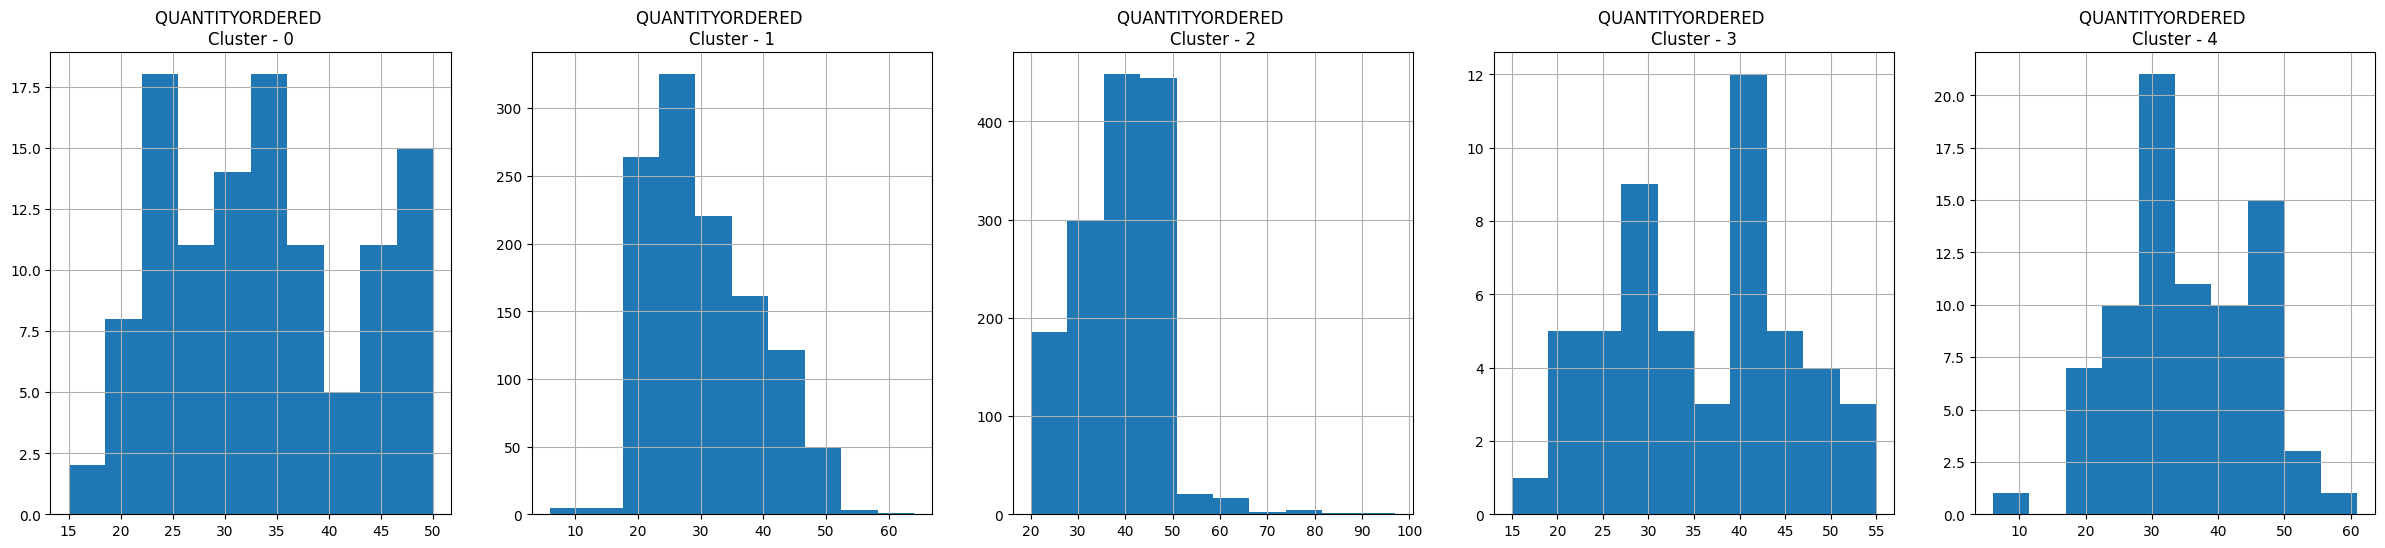

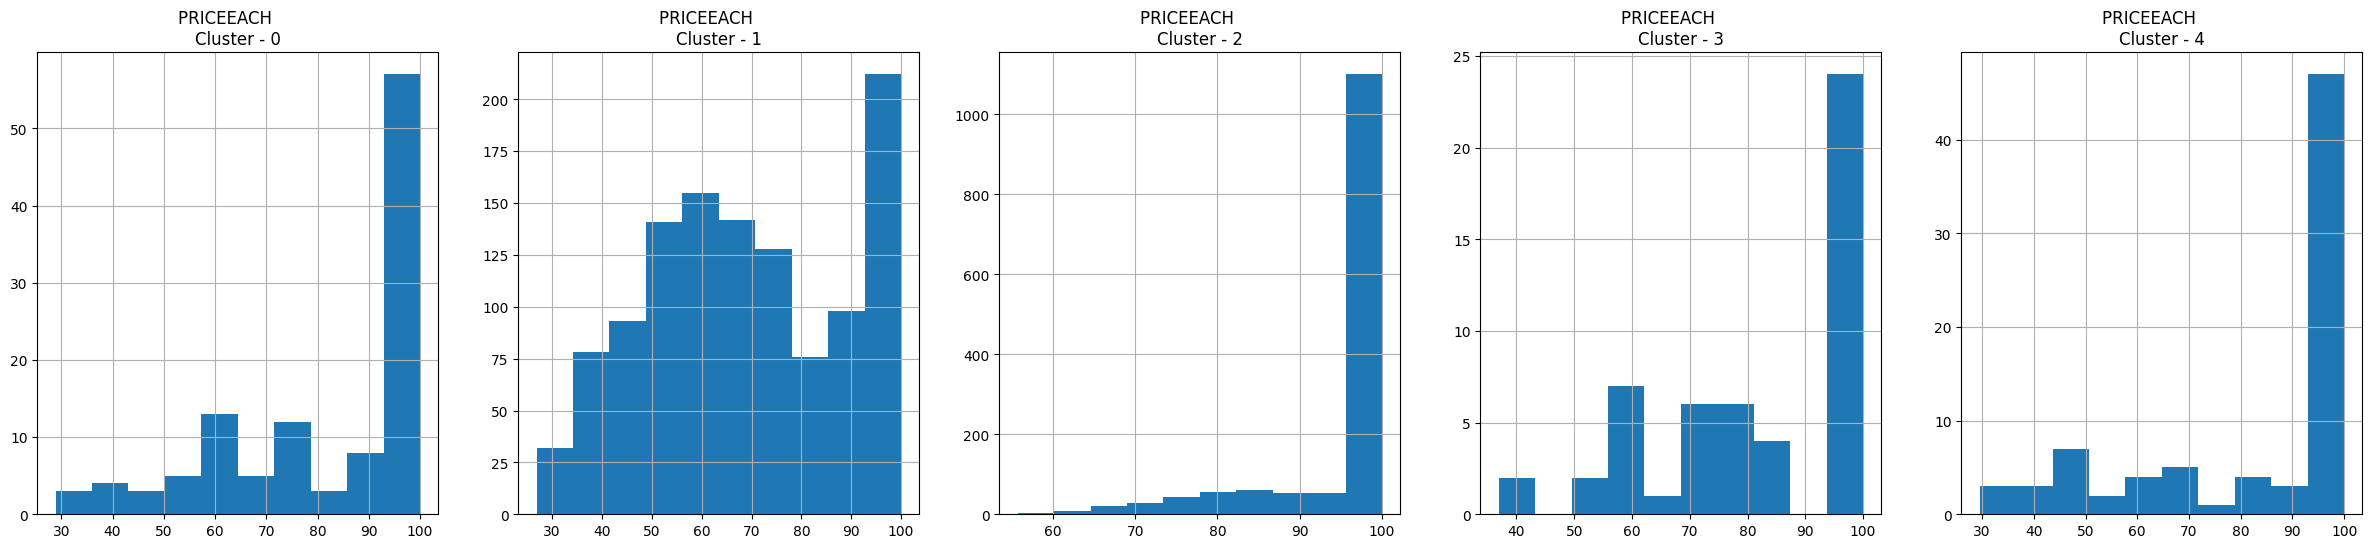

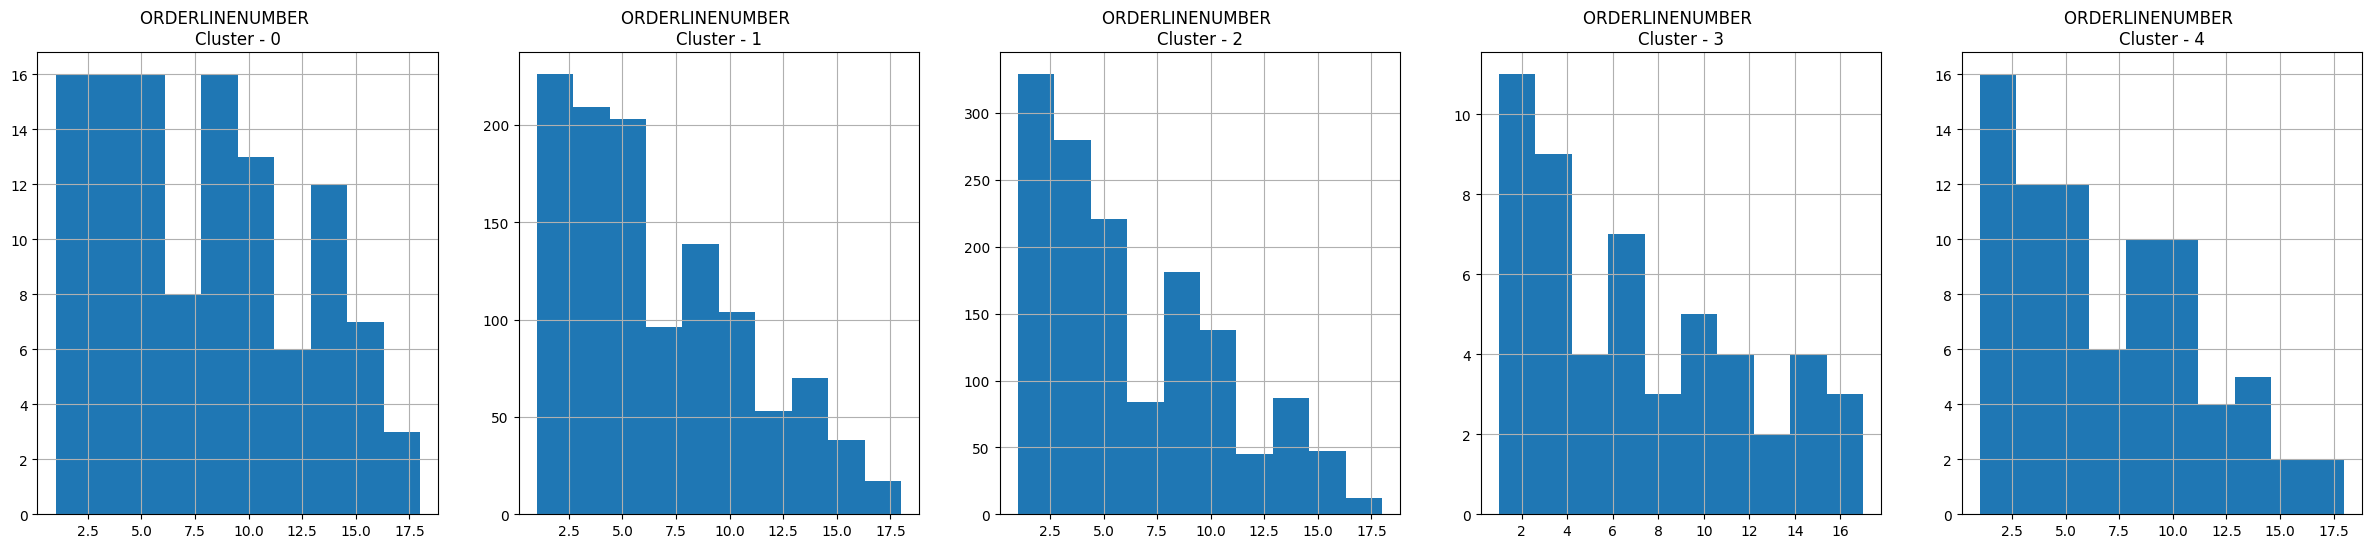

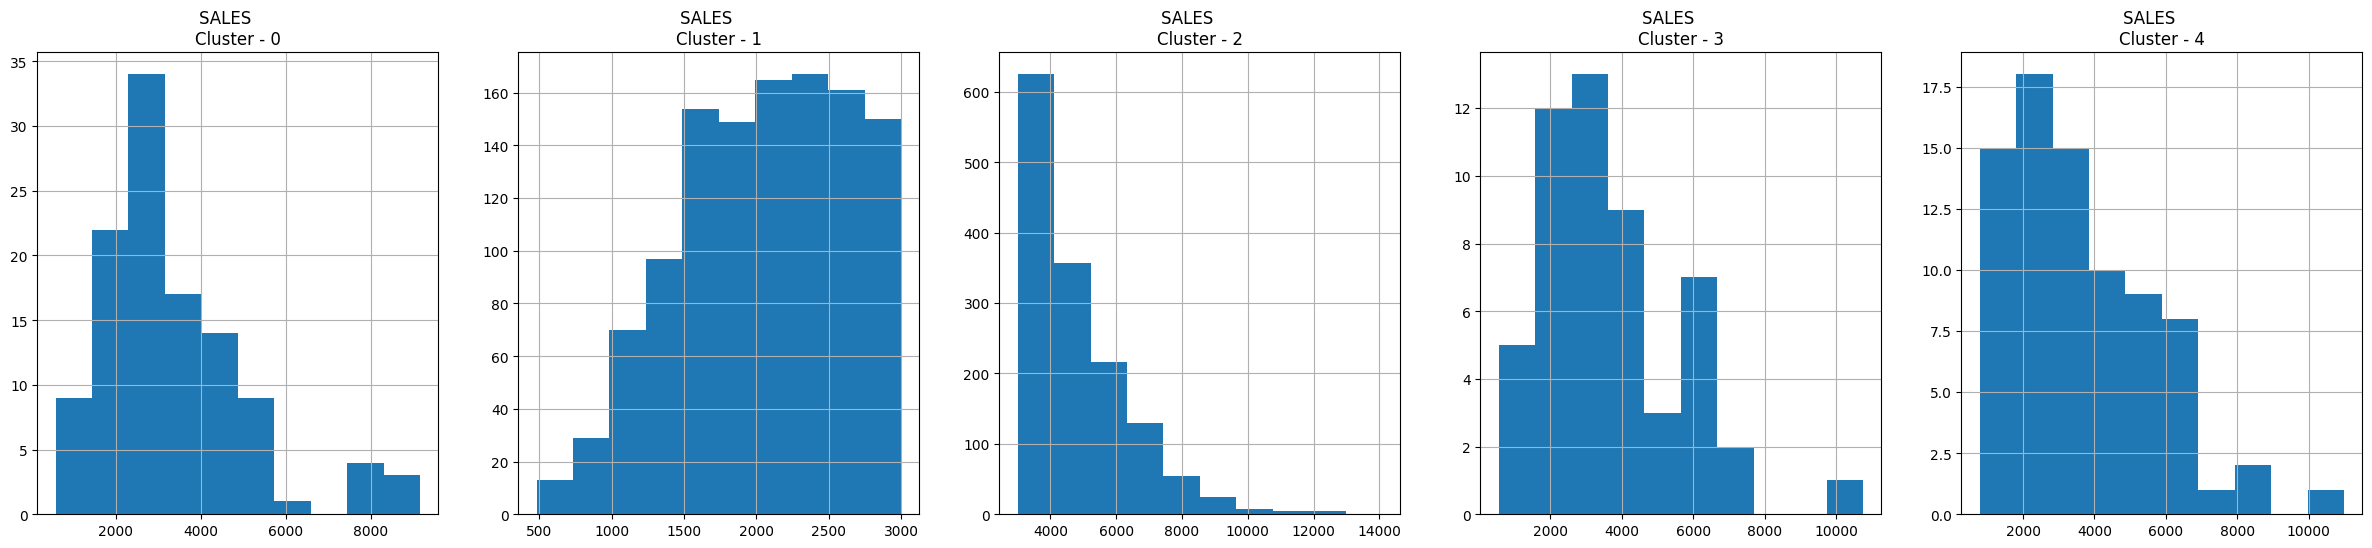

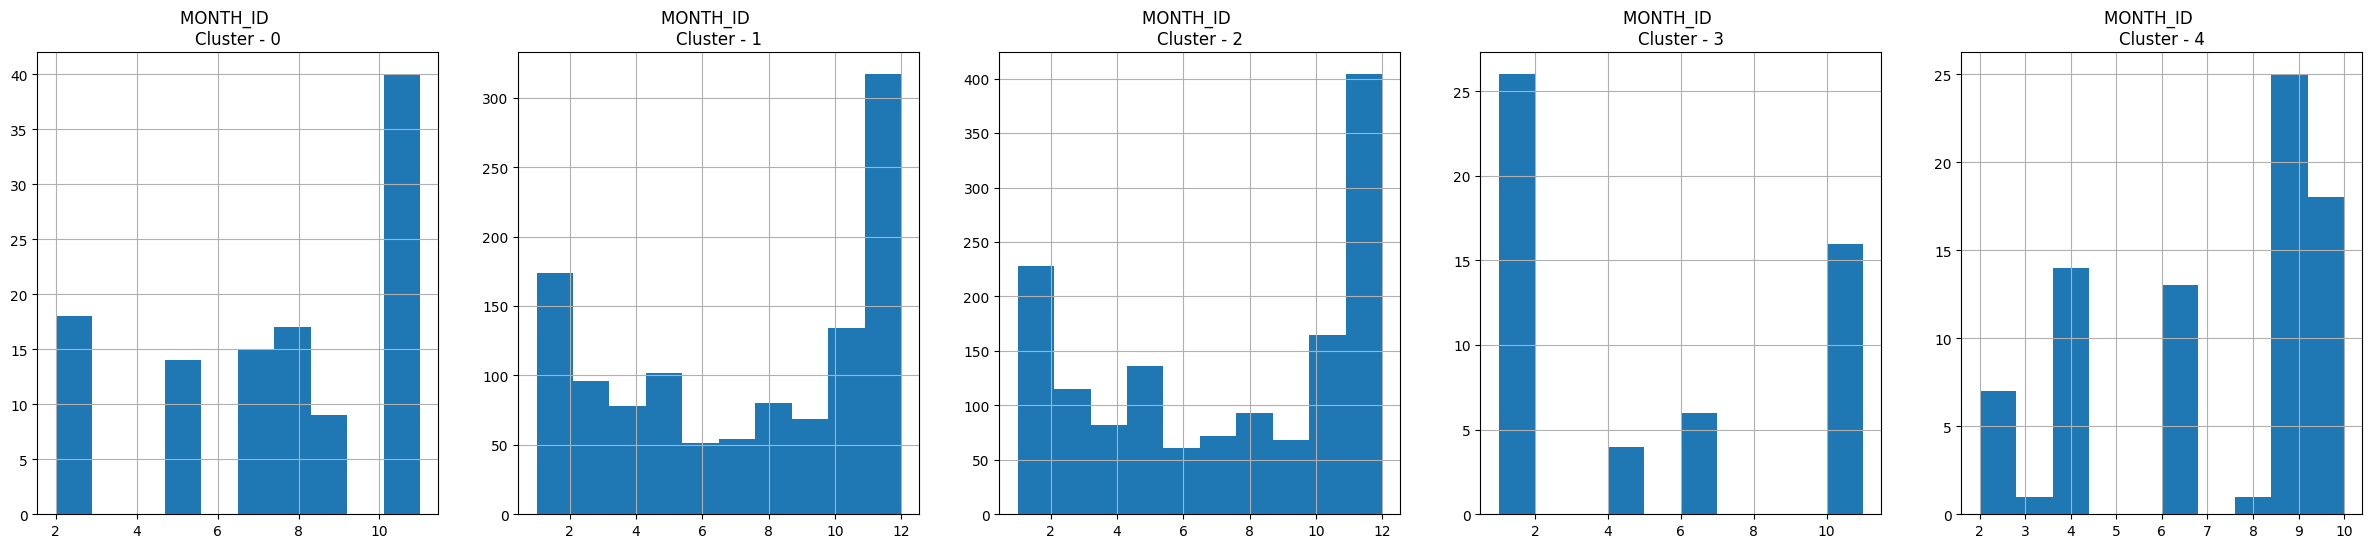

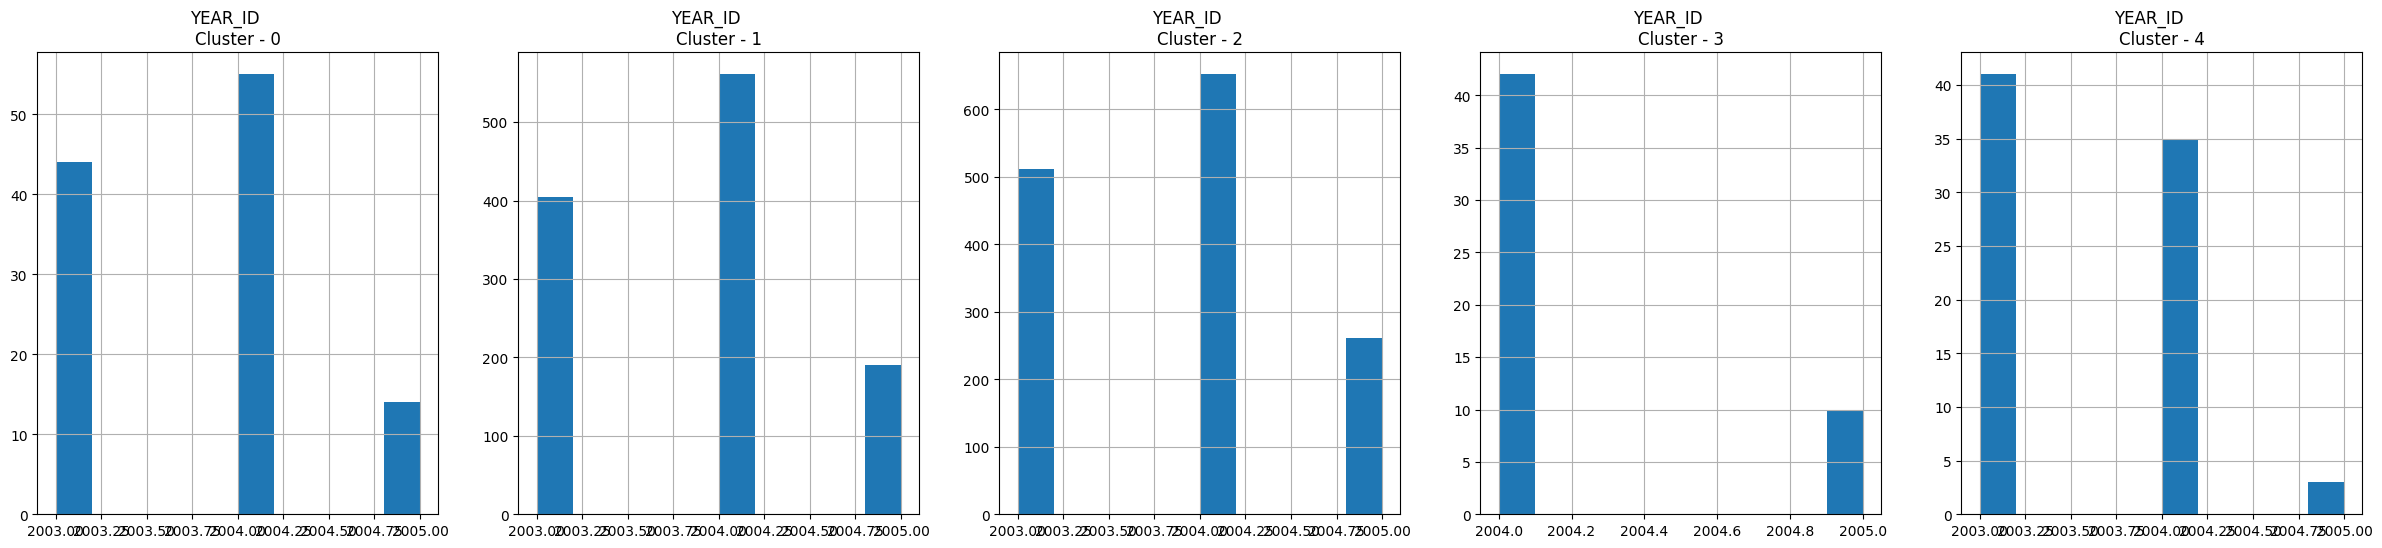

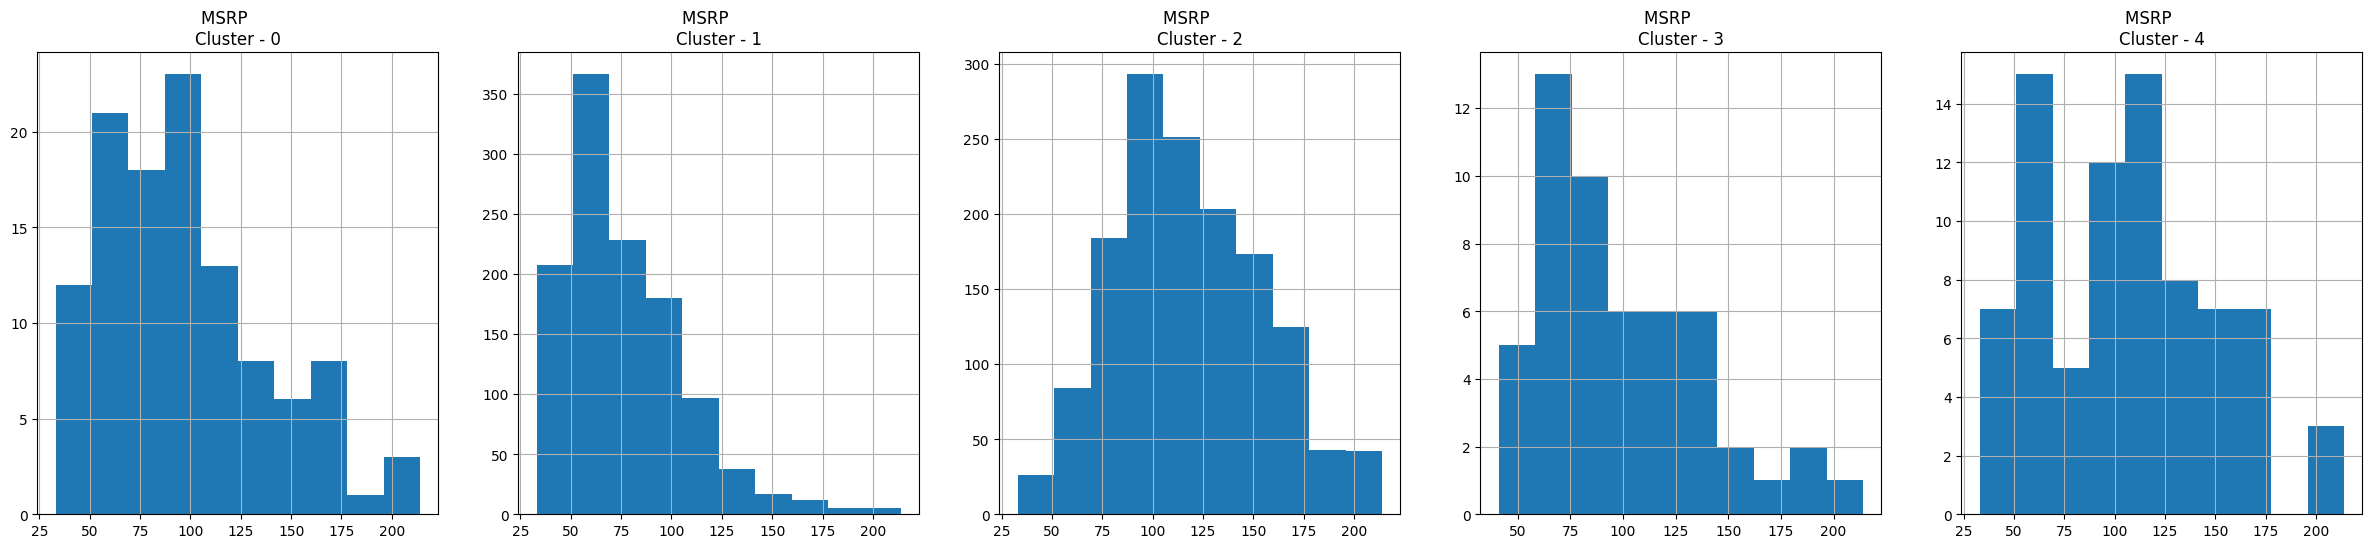

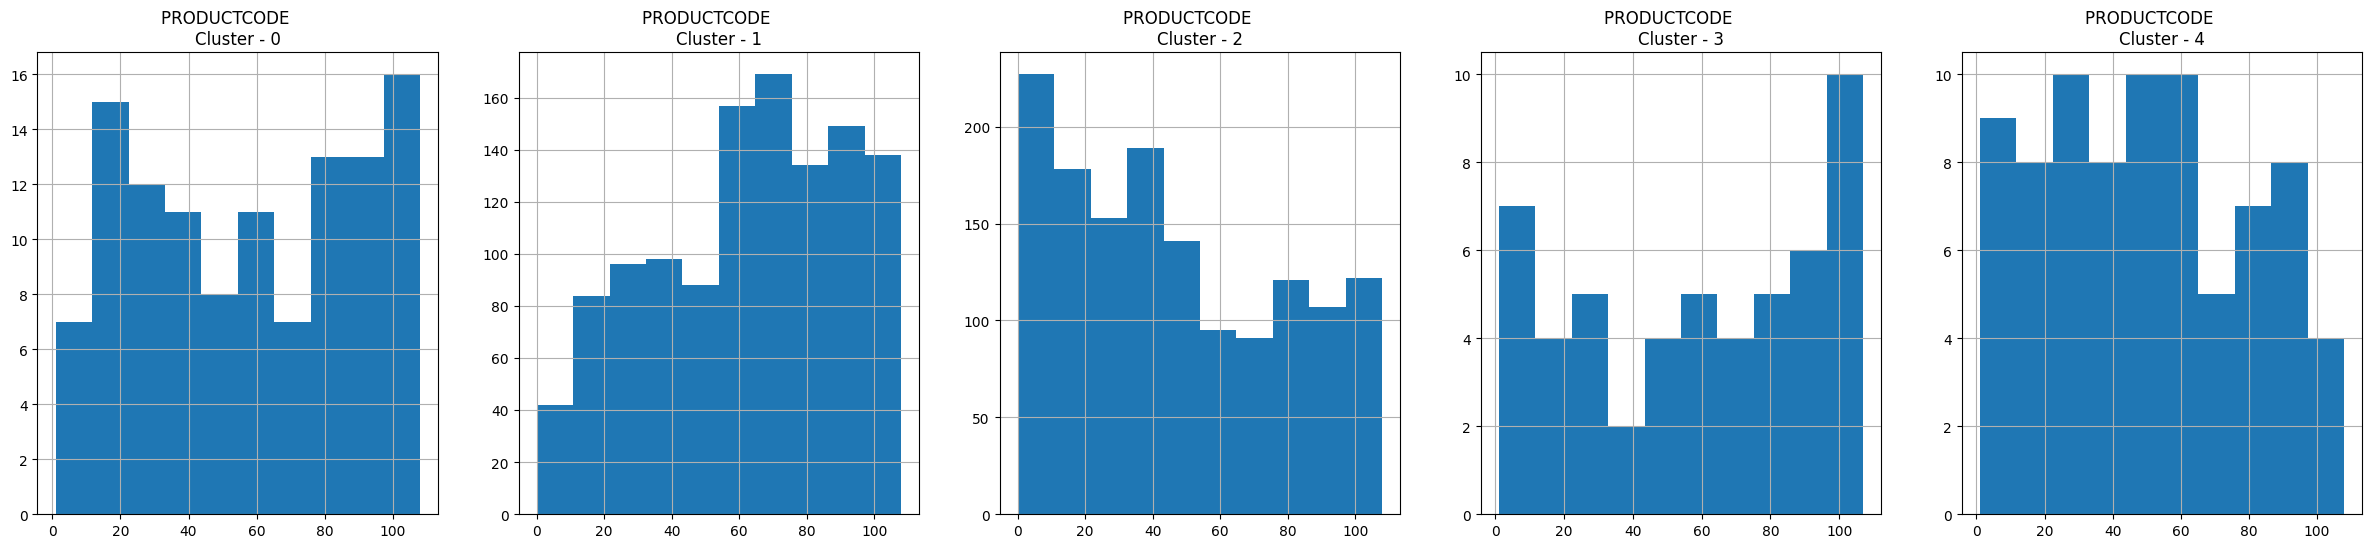

In [38]:
# Representamos un histograma para cada caracteristica segun el cluster al que pertenece
for i in sales_df.columns[:8]:
  plt.figure(figsize=(30,6))
  for j in range(5):
    plt.subplot(1, 5, j+1)
    cluster = sale_df_cluster[sale_df_cluster['cluster']==j]
    cluster[i].hist()
    plt.title('{}     \nCluster - {}'.format(i,j))

**Reduccion de componentes**

In [39]:
# Reducir los datos originales a 3 dimensiones usando PCA para visualizar los clusteres
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(sales_df_scaled)
principal_comp

array([[-0.37424921, -1.31817326, -2.62050755],
       [-0.69457281, -0.75470216, -2.43373939],
       [ 1.70556188, -0.39125026, -1.67013947],
       ...,
       [ 0.6918255 ,  3.93905709,  1.95904791],
       [-2.70094337,  3.01971003, -0.05965701],
       [-0.43441687,  2.60107627,  1.4024909 ]])

In [41]:
pca_df = pd.DataFrame(data=principal_comp, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df

,PCA1,PCA2,PCA3
0,-0.374249,-1.318173,-2.620508
1,-0.694573,-0.754702,-2.433739
2,1.705562,-0.391250,-1.670139
3,1.557204,-1.305799,-1.191713
4,2.267258,-1.460993,-0.545662
...,...,...,...
2818,-2.316195,0.910844,2.913352
2819,0.134982,4.052576,0.587855
2820,0.691825,3.939057,1.959048
2821,-2.700943,3.019710,-0.059657


In [42]:
# Concatenamos con las etiquetas del cluster
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df

,PCA1,PCA2,PCA3,cluster
0,-0.374249,-1.318173,-2.620508,1
1,-0.694573,-0.754702,-2.433739,1
2,1.705562,-0.391250,-1.670139,2
3,1.557204,-1.305799,-1.191713,2
4,2.267258,-1.460993,-0.545662,2
...,...,...,...,...
2818,-2.316195,0.910844,2.913352,1
2819,0.134982,4.052576,0.587855,2
2820,0.691825,3.939057,1.959048,2
2821,-2.700943,3.019710,-0.059657,1


In [45]:
# Visualizar los clusteres con 3D-Scatterplot
fig = px.scatter_3d(pca_df, x='PCA1', y='PCA2',z='PCA3', color='cluster', symbol='cluster', size_max=6, opacity=0.7)
fig.update_layout(margin=dict(l=0,r=0,b=0,t=0))
fig.show()

In [46]:
# Reducir los datos originales a 2 dimensiones usando PCA para visualizar los clusteres
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(sales_df_scaled)
principal_comp

array([[-0.37413923, -1.34013305],
       [-0.69431012, -0.78149081],
       [ 1.70584101, -0.40480672],
       ...,
       [ 0.69179477,  3.94075079],
       [-2.70084095,  3.04708523],
       [-0.43448048,  2.60400761]])

In [47]:
pca_df = pd.DataFrame(data=principal_comp, columns=['PCA1', 'PCA2'])
pca_df

,PCA1,PCA2
0,-0.374139,-1.340133
1,-0.694310,-0.781491
2,1.705841,-0.404807
3,1.557346,-1.338194
4,2.267338,-1.514324
...,...,...
2818,-2.316414,0.883304
2819,0.134528,4.003465
2820,0.691795,3.940751
2821,-2.700841,3.047085


In [48]:
# Concatenamos con las etiquetas del cluster
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df

,PCA1,PCA2,cluster
0,-0.374139,-1.340133,1
1,-0.694310,-0.781491,1
2,1.705841,-0.404807,2
3,1.557346,-1.338194,2
4,2.267338,-1.514324,2
...,...,...,...
2818,-2.316414,0.883304,1
2819,0.134528,4.003465,2
2820,0.691795,3.940751,2
2821,-2.700841,3.047085,1


In [51]:
fig = px.scatter(pca_df,x='PCA1', y='PCA2', color='cluster', symbol='cluster')
fig.show()

**Autoencoding para la reduccion de dimensionalidad a traves de redes neuronales**

In [55]:
sales_df.shape

(2823, 34)

In [56]:
# Arquitectura de red

input_df = Input(shape=(34,))
x = Dense(50, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(8, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(34, kernel_initializer='glorot_uniform')(x)

# Autoencoder
autoencoder = Model(input_df, decoded)

# encoder - utilizado solo para reducir la dimensionalidad
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Entrenamos el autoencoder
autoencoder.fit(sales_df, sales_df, batch_size=128, epochs=500, verbose=3)

In [58]:
autoencoder.save_weights('autoencoder_1.h5')

In [60]:
# Predecimos con el encoder (ya se entreno a partir del autoencoder)
pred = encoder.predict(sales_df_scaled)

89/89 [==============================] - 1s 11ms/step


In [61]:
pred

array([[0.147738  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.6369767 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.32098258, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.74700844, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.52692384, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.20765007, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

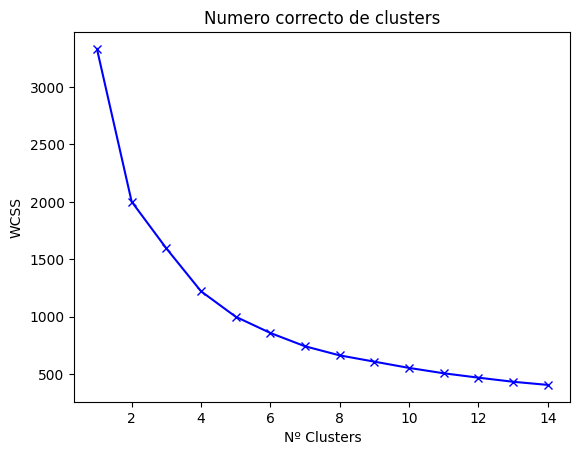

In [62]:
scores = []

range_values = range(1,15)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(pred)
  scores.append(kmeans.inertia_)

# Visualizamos
plt.plot(range_values, scores, 'bx-')
plt.title('Numero correcto de clusters')
plt.xlabel('Nº Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Entrenamos y predecimos con el cluster y las caracteristicas de dimensionalidad reducidas
kmeans = KMeans(5)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(sales_df_scaled)

In [86]:
# Creamos df con las etiquetas correspondientes
df_cluster_dr = pd.concat([sales_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Medium,Small,...,Switzerland,UK,USA,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,cluster
0,30,95.70,2,2871.00,2,2003,95,0,0,1,...,0,0,1,1,0,0,0,0,0,0
1,34,81.35,5,2765.90,5,2003,95,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,41,94.74,2,3884.34,7,2003,95,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,45,83.26,6,3746.70,8,2003,95,0,1,0,...,0,0,1,1,0,0,0,0,0,2
4,49,100.00,14,5205.27,10,2003,95,0,1,0,...,0,0,1,1,0,0,0,0,0,2


In [87]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Medium,Small,...,Sweden,Switzerland,UK,USA,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,0.041123,-0.377009,0.173684,-0.314308,0.047651,-0.040632,-0.681475,0.619387,-0.287238,0.373321,...,-0.048758,-0.105371,0.010562,-0.046618,-0.364452,-0.348674,-0.300637,5.971795,-0.345470,-0.523371
1,-0.463459,-0.758744,0.030245,-0.820582,0.030759,-0.029941,-0.579599,0.156418,-0.980703,1.096370,...,0.004145,-0.023822,0.008502,-0.011112,0.087558,-0.348674,0.134319,-0.167454,0.018617,0.214433
2,-0.022408,-0.147183,0.230256,-0.281336,-0.108204,0.164711,-0.388519,0.922511,-0.193097,0.249593,...,-0.094008,-0.105371,-0.025968,-0.087864,-0.364452,2.868012,-0.300637,-0.167454,-0.345470,-0.523371
3,-0.458721,0.122217,-0.450563,0.030348,-0.555241,0.264328,0.153293,0.248632,-0.230561,0.092135,...,-0.143553,-0.105371,-0.231843,-0.742934,0.024086,0.455498,-0.300637,0.599952,-0.142966,-0.371242
4,0.361825,0.629200,-0.074985,0.701895,0.002735,-0.012083,0.558411,-0.346926,0.807515,-0.910651,...,0.020595,0.046940,0.000986,0.037784,0.028010,-0.313861,-0.020637,-0.167454,0.077656,-0.022860


In [88]:
# realizamos la transformacion inversa
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Medium,Small,...,Sweden,Switzerland,UK,USA,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,35.493333,76.054000,7.200000,2975.078267,7.266667,2003.786667,73.333333,73.333333,3.466667e-01,0.640000,...,0.013333,-5.204170e-18,5.333333e-02,0.333333,4.163336e-17,-8.326673e-17,-1.387779e-17,1.000000e+00,5.551115e-17,1.110223e-16
1,30.578848,68.354145,6.593957,2042.755930,7.204910,2003.794145,77.426818,58.712937,-1.054712e-15,1.000000,...,0.020774,8.498584e-03,5.288008e-02,0.350331,1.454202e-01,5.828671e-16,1.199245e-01,1.249001e-16,1.123702e-01,3.031161e-01
2,34.874564,80.689756,7.439024,3035.797422,6.696864,2003.930314,85.104530,82.905923,3.937282e-01,0.578397,...,0.006969,4.683753e-17,4.529617e-02,0.313589,-3.885781e-16,1.000000e+00,4.163336e-17,-1.040834e-16,0.000000e+00,4.996004e-16
3,30.625000,86.123750,4.562500,3609.776875,5.062500,2004.000000,106.875000,61.625000,3.750000e-01,0.500000,...,0.000000,-1.734723e-18,-6.938894e-18,0.000000,1.250000e-01,2.500000e-01,0.000000e+00,1.250000e-01,6.250000e-02,6.250000e-02
4,38.616883,96.349957,6.149351,4846.456825,7.102453,2003.806638,123.152958,42.817460,8.939394e-01,0.000722,...,0.023088,1.587302e-02,5.122655e-02,0.373737,1.262626e-01,1.082251e-02,7.720058e-02,-1.387779e-17,1.305916e-01,2.056277e-01


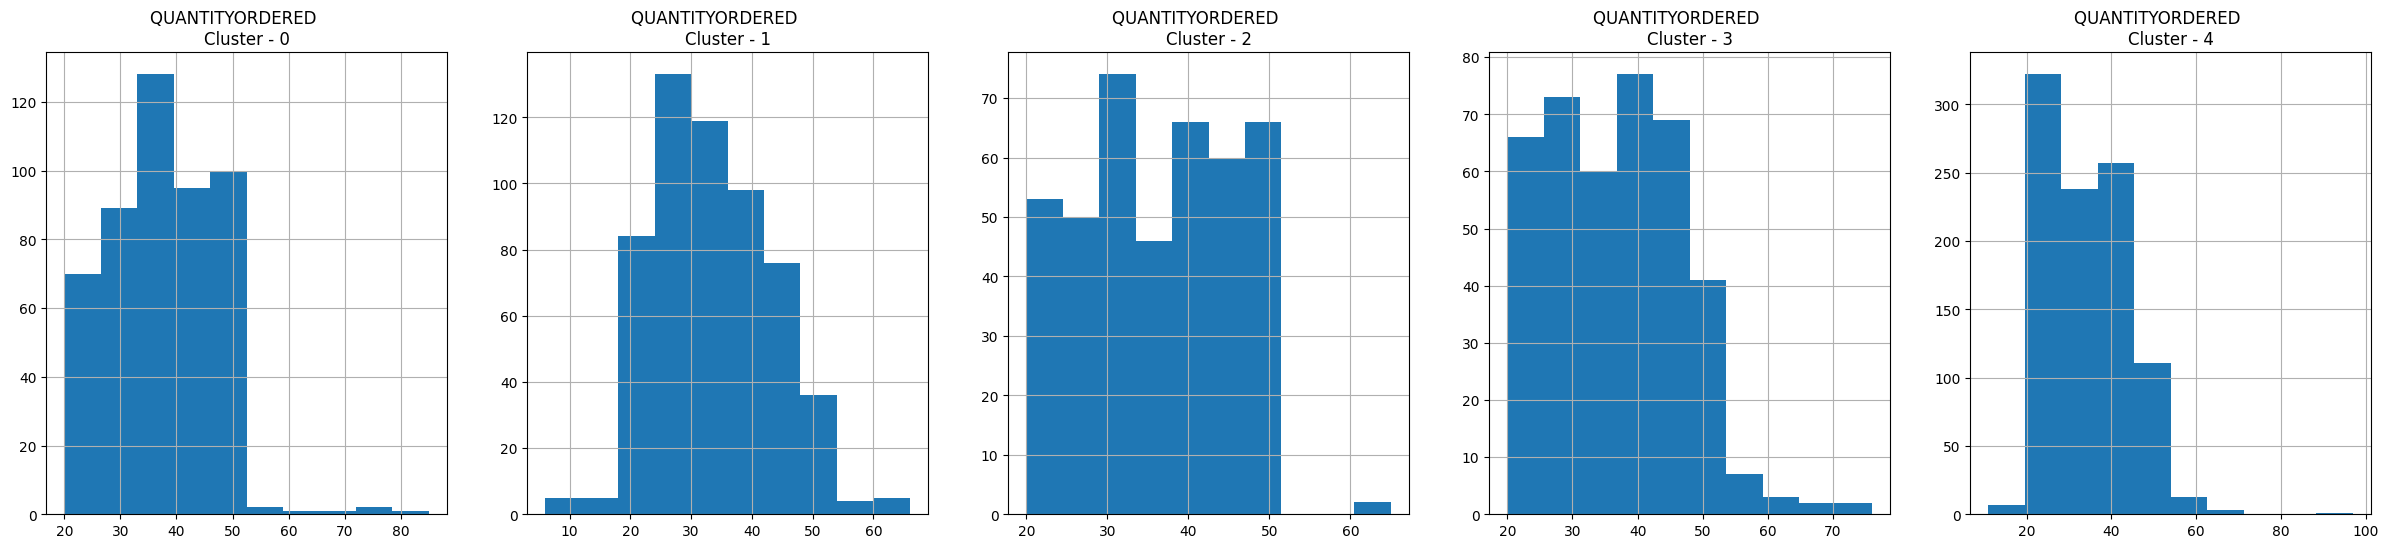

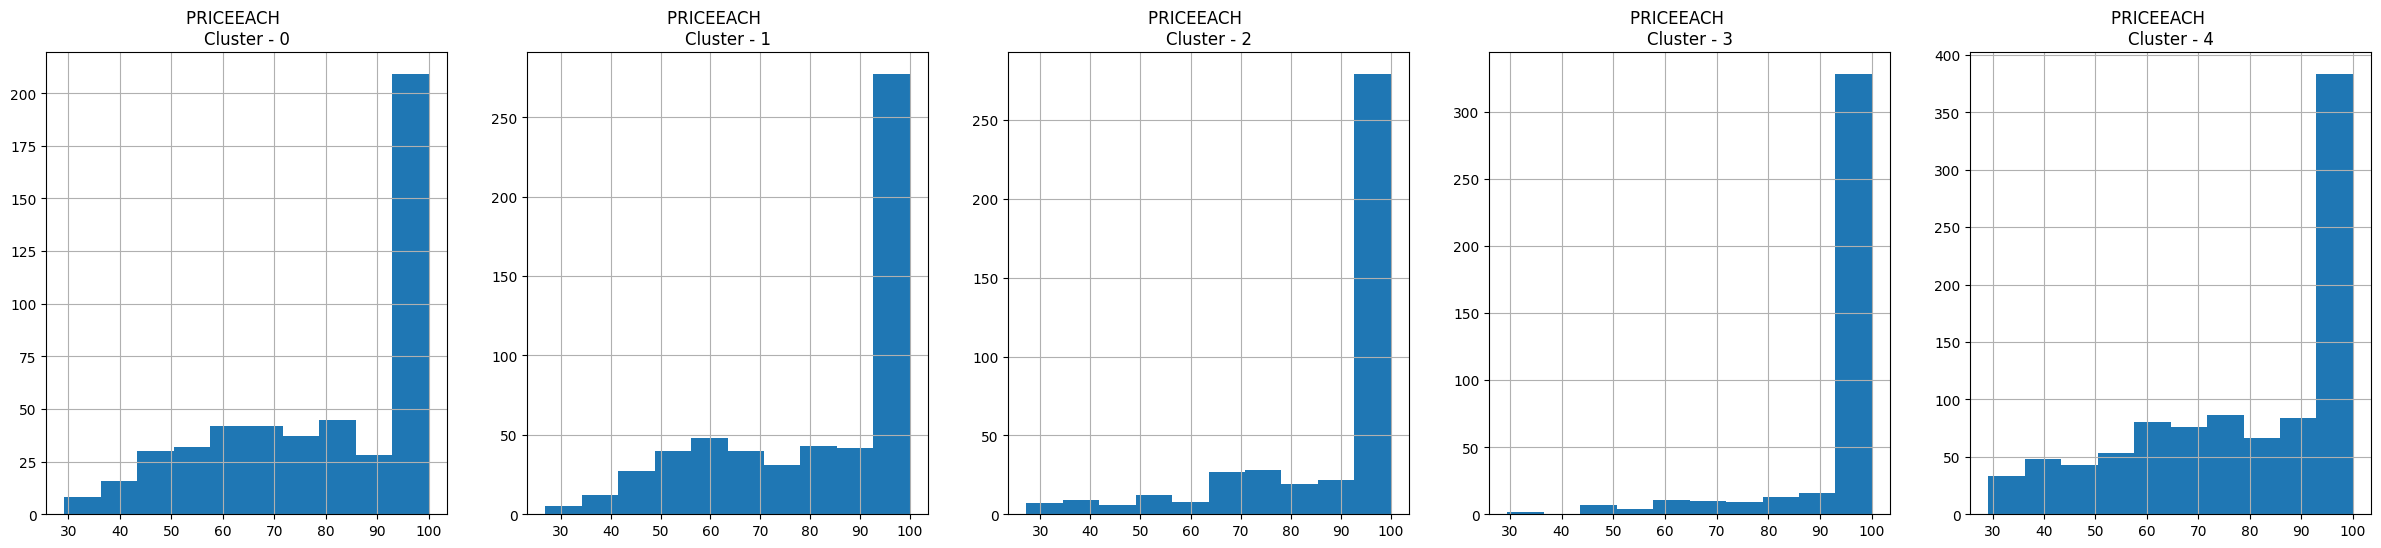

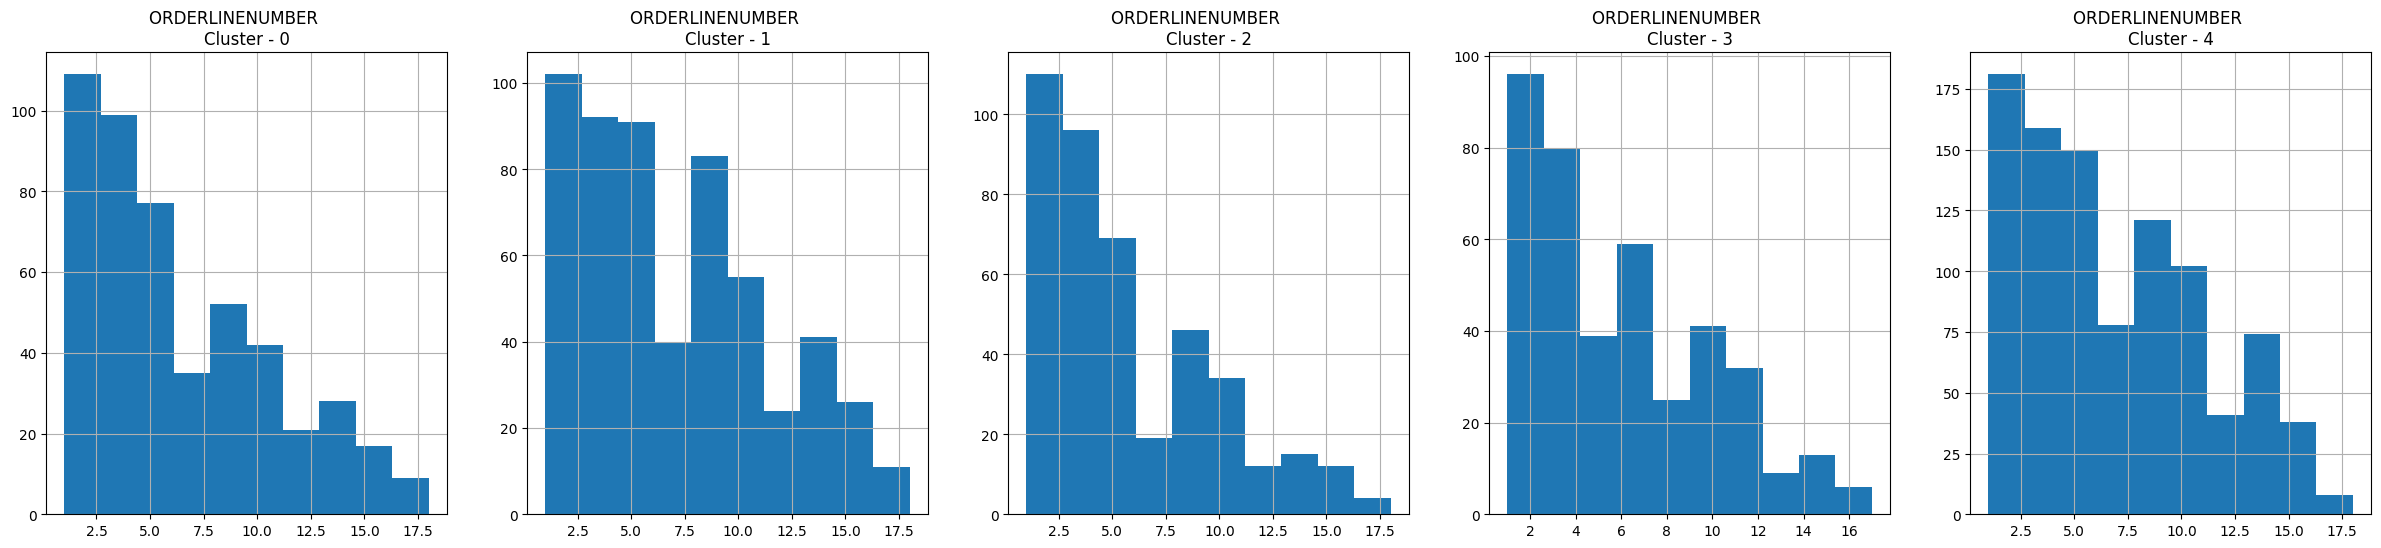

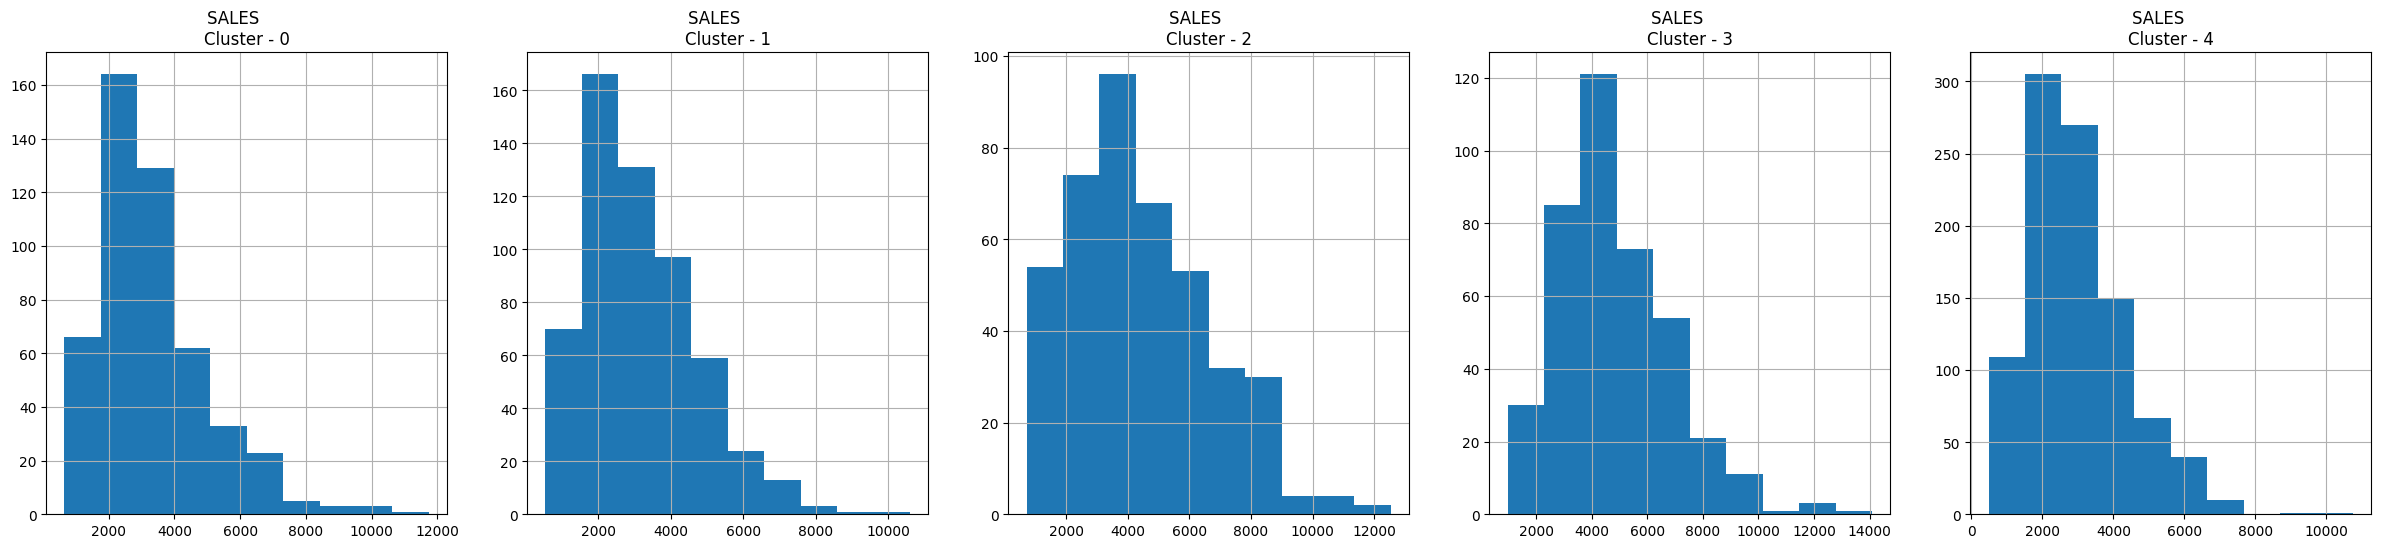

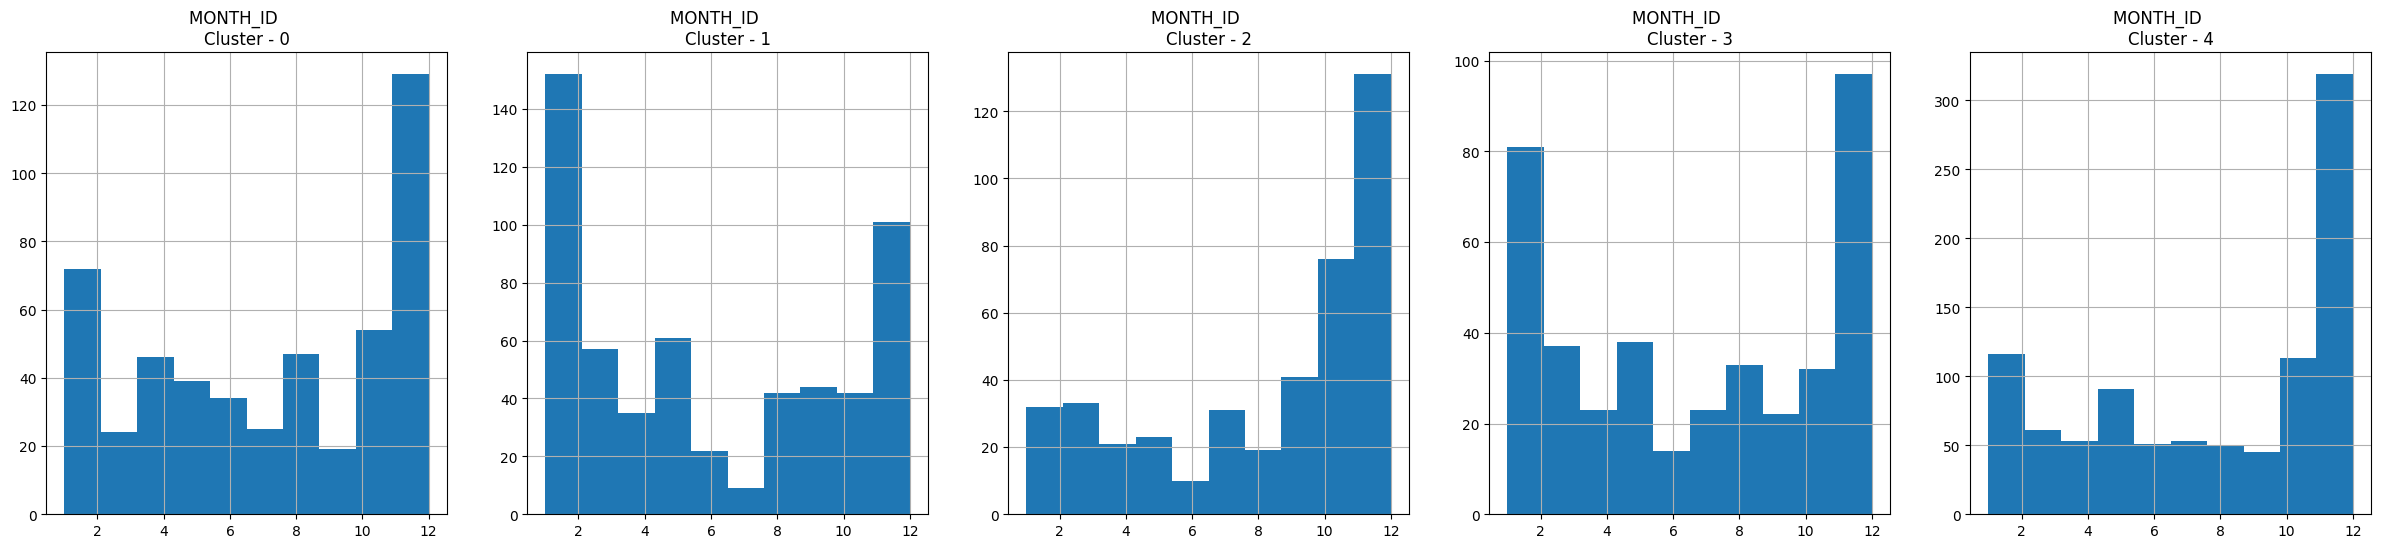

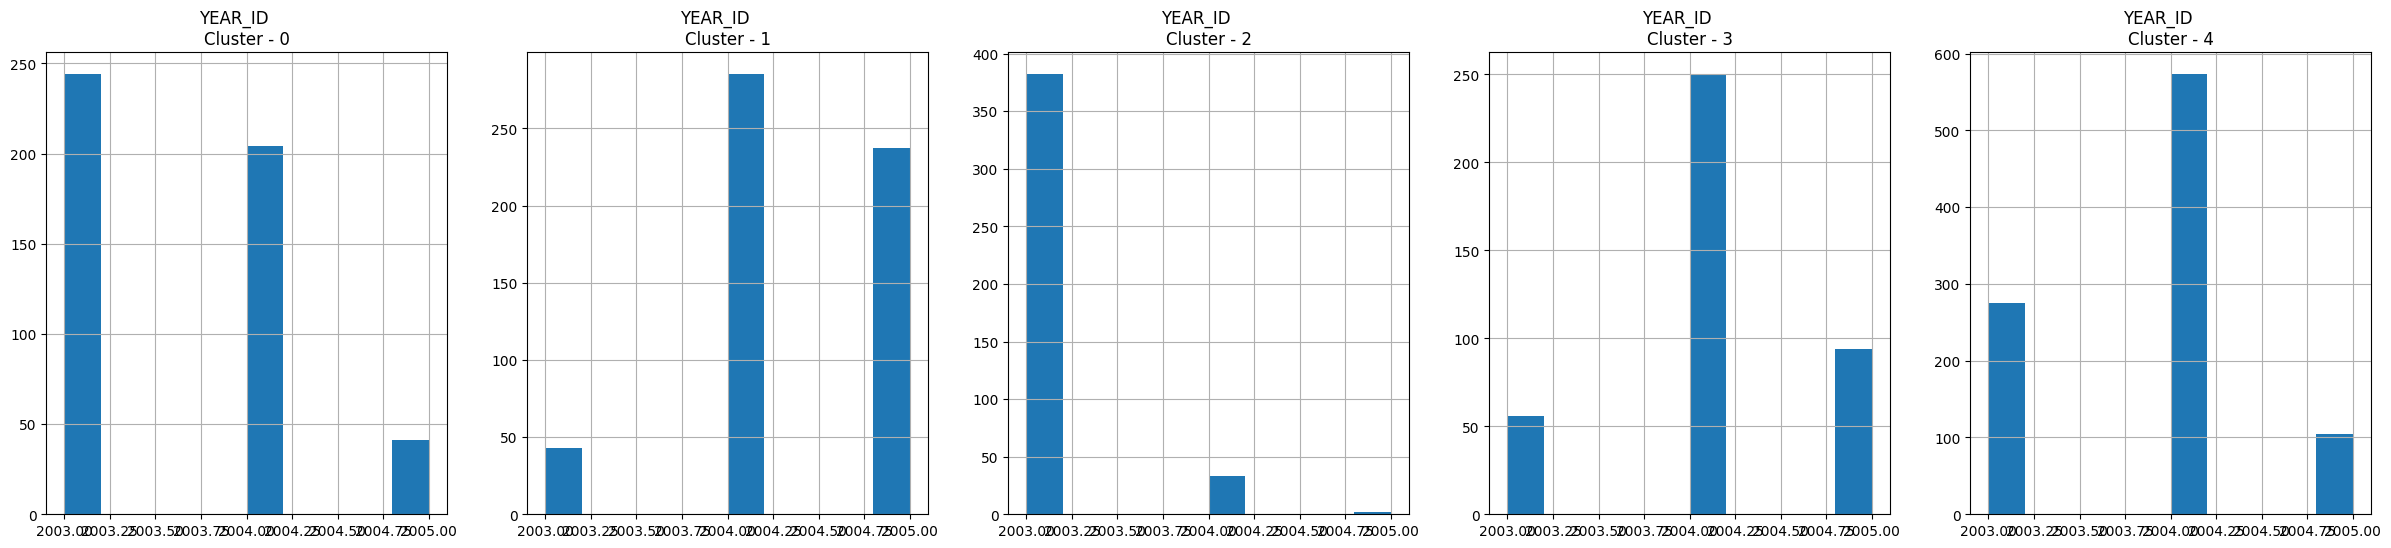

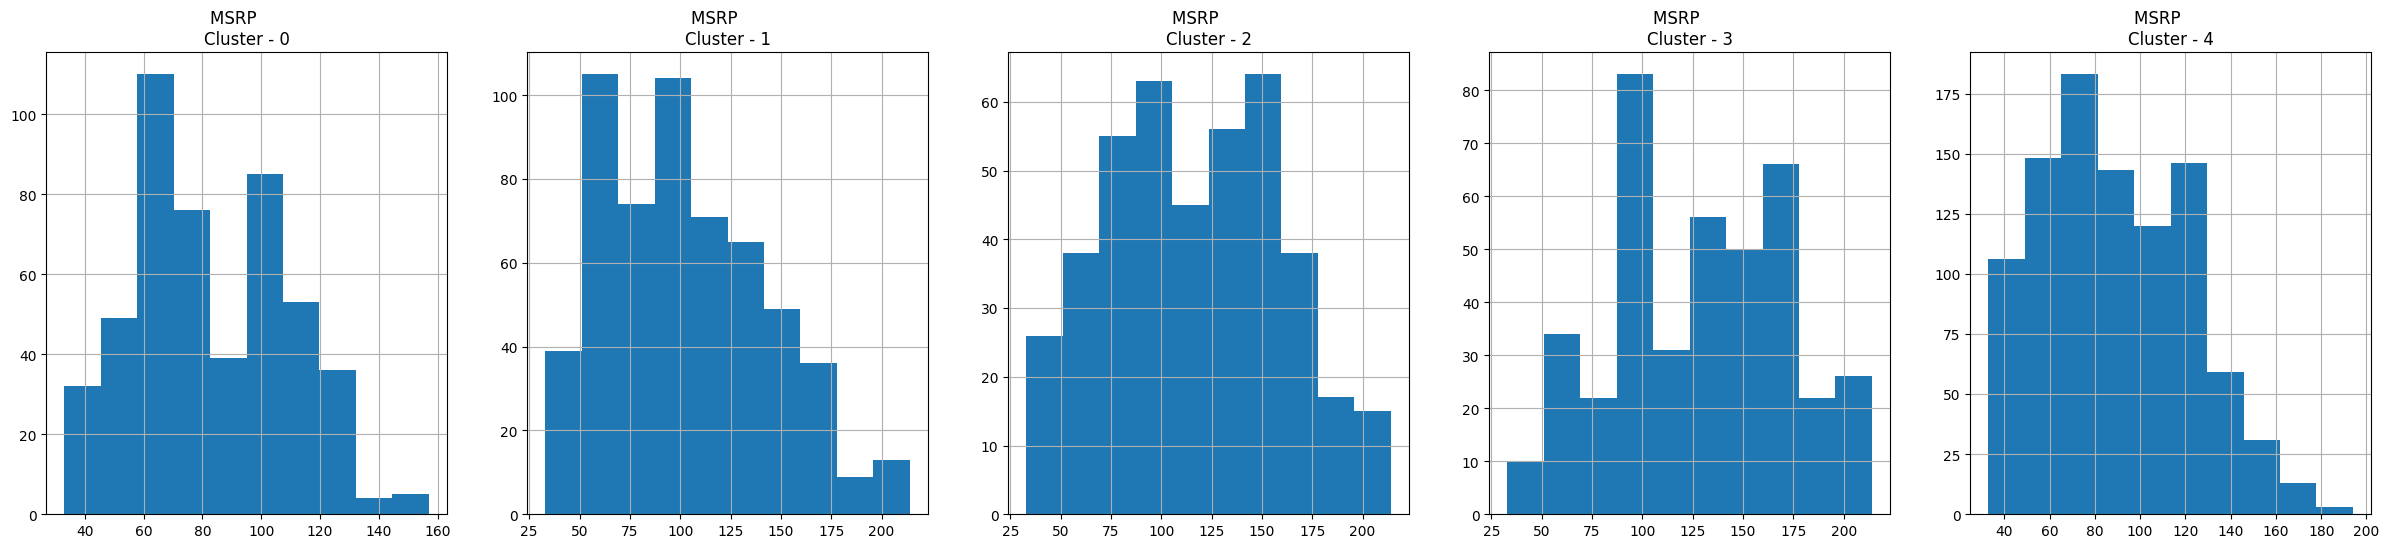

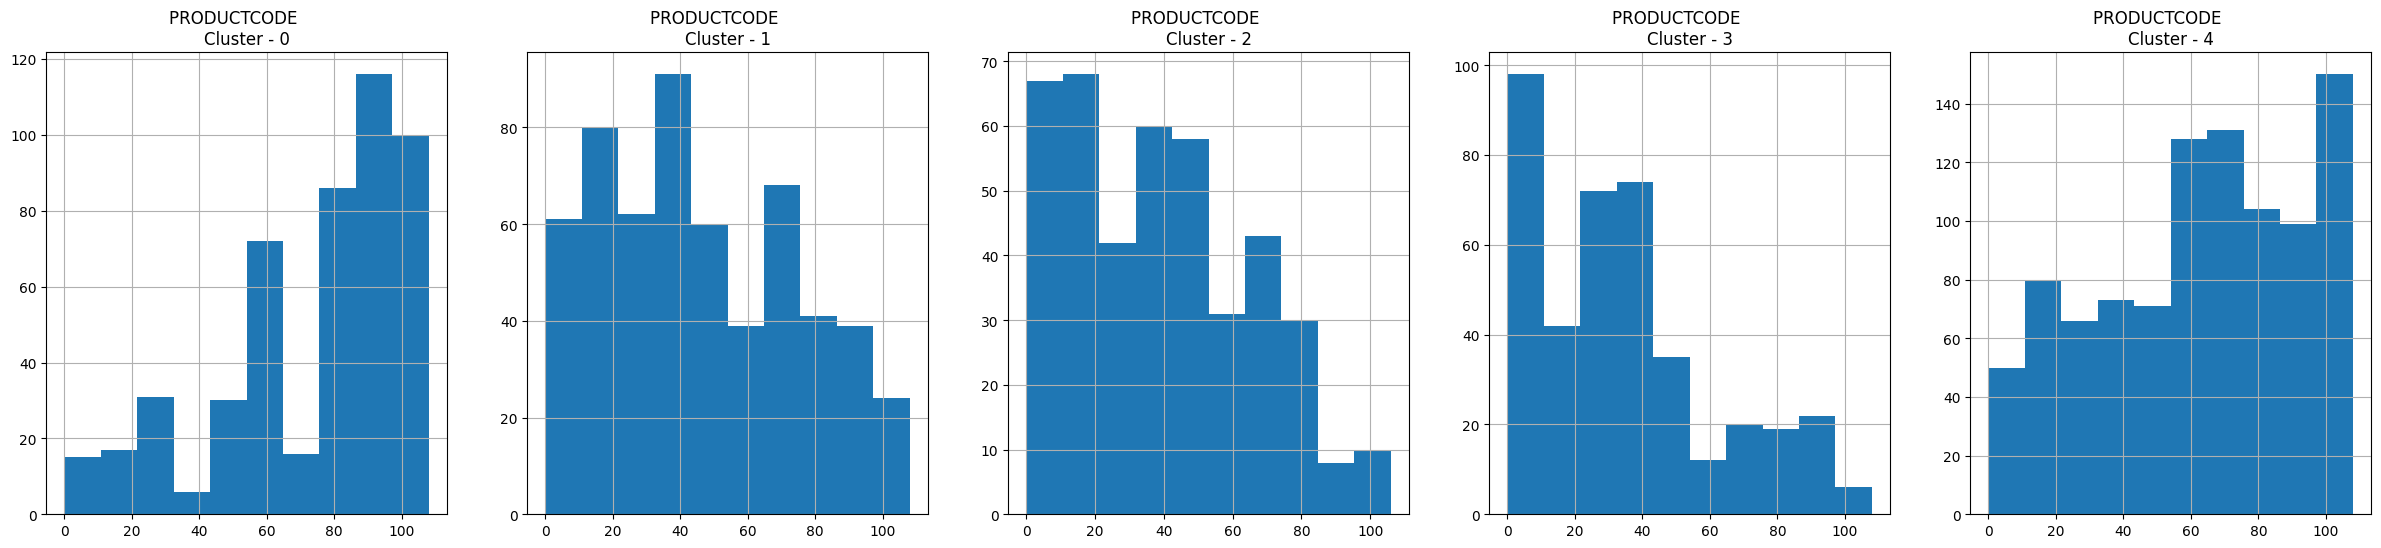

In [89]:
# Representamos un histograma para cada caracteristica segun el cluster al que pertenece
for i in sales_df.columns[:8]:
  plt.figure(figsize=(30,6))
  for j in range(5):
    plt.subplot(1, 5, j+1)
    cluster = df_cluster_dr[df_cluster_dr['cluster']==j]
    cluster[i].hist()
    plt.title('{}     \nCluster - {}'.format(i,j))

In [90]:
# Reducir los datos originales a 3 dimensiones usando PCA para visualizar los clusteres
pca = PCA(n_components=3)
prin_comp = pca.fit_transform(sales_df_scaled)
prin_comp

array([[-0.37422208, -1.30807874, -2.59678551],
       [-0.69452924, -0.77985635, -2.3901287 ],
       [ 1.70554589, -0.41478238, -1.56835372],
       ...,
       [ 0.6918208 ,  3.93722782,  1.92181836],
       [-2.70103451,  3.02598782,  0.03473855],
       [-0.43446146,  2.61149912,  1.39991336]])

In [91]:
pca_df = pd.DataFrame(data=prin_comp, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df

,PCA1,PCA2,PCA3
0,-0.374222,-1.308079,-2.596786
1,-0.694529,-0.779856,-2.390129
2,1.705546,-0.414782,-1.568354
3,1.557243,-1.317902,-1.166011
4,2.267341,-1.480799,-0.593547
...,...,...,...
2818,-2.316198,0.918548,2.762453
2819,0.134714,4.012800,0.601937
2820,0.691821,3.937228,1.921818
2821,-2.701035,3.025988,0.034739


In [92]:
# Concatenamos con las etiquetas del cluster
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df

,PCA1,PCA2,PCA3,cluster
0,-0.374222,-1.308079,-2.596786,0
1,-0.694529,-0.779856,-2.390129,0
2,1.705546,-0.414782,-1.568354,0
3,1.557243,-1.317902,-1.166011,2
4,2.267341,-1.480799,-0.593547,2
...,...,...,...,...
2818,-2.316198,0.918548,2.762453,4
2819,0.134714,4.012800,0.601937,1
2820,0.691821,3.937228,1.921818,4
2821,-2.701035,3.025988,0.034739,0


In [93]:
# Visualizamos en 3d
fig = px.scatter_3d(pca_df, x='PCA1', y='PCA2',z='PCA3', color='cluster', symbol='cluster', size_max=10, opacity=0.7)
fig.update_layout(margin=dict(l=0,r=0,b=0,t=0))
fig.show()